# Lower West NYC Dining FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define your custom directory path
#custom_directory = '/content/drive'

In [ ]:
# Write your code here to read the data
df= pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')


In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


The dataset has been loaded properly

Dataset consists of nine columns displaying the various attributes related to the food order processes

Categorical Variables:

1. restaurant_name: Names of restaurants represent distinct categories.
2. cuisine_type: Different types of cuisines represent categories.
3. day_of_the_week: The day of the week can be treated as a categorical variable (e.g., Monday, Tuesday, etc.).

Numerical Variables:

1. cost_of_the_order: This is a continuous numerical variable representing the cost of the order.
2. rating: Ratings are numerical, though they are usually on a fixed scale (e.g., 1-5), so they can also be treated as ordinal categorical variables depending on the context.
3. food_preparation_time: This is a continuous numerical variable representing the time (in minutes).
4. delivery_time: This is also a continuous numerical variable representing the delivery time (in minutes).



The performance of the food prep process and delivery has been defined by the users under rating and delivery_time columns

Unique per customer and order id displays
Dataset has also been formatted with time expired metrics on the right side


From the head of the dataset, it can be observed that there are no missing values

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]


The dataset has been loaded properly

Dataset consists of nine columns displaying the various attributes related to the food order processes

General Structure and Size-

The DataFrame has 1898 entries (rows) and 9 columns.

1. All columns have 1898 non-null values, indicating there are no missing values in any of the columns.

2. Data Types of Each Column-

  a.) int64: There are four integer columns (order_id, customer_id, food_preparation_time, delivery_time), which are suitable for data that does not require decimal precision.
  
  b.) float64: cost_of_the_order is stored as a float, which is appropriate for cost data that might need decimal precision.
  
  c.) object: Four columns (restaurant_name, cuisine_type, day_of_the_week, and rating) are of type object.

3. Memory Usage
The DataFrame occupies approximately 133.6 KB of memory. This is efficient for the given data size but could be further optimized if required.

Categorical Variables:

1. restaurant_name: Names of restaurants represent distinct categories.
2. cuisine_type: Different types of cuisines represent categories.
3. day_of_the_week: The day of the week can be treated as a categorical variable (e.g., Monday, Tuesday, etc.).

Numerical Variables:

1. cost_of_the_order: This is a continuous numerical variable representing the cost of the order.
2. rating: Ratings are numerical, though they are usually on a fixed scale (e.g., 1-5), so they can also be treated as ordinal categorical variables depending on the context.
3. food_preparation_time: This is a continuous numerical variable representing the time (in minutes).
4. delivery_time: This is also a continuous numerical variable representing the delivery time (in minutes).



The performance of the food prep process and delivery have been defined by the users under rating and delivery_time columns

Unique per customer ids and order i displays

Dataset has also been formatted with the performance metrics on the right side

From the head of the dataset, it can be observed that there are no missing values

In [ ]:
# Write your code here
# Check for missing values in each column,
# Use the isnull().sum() function to check for missing values in each column.
missing_values = df.isnull().sum()
print(missing_values)


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

From the dataFrame.isnull, it can be observed that there are no missing values

In [ ]:
# Write your code here
# Display statistical summary of the data
df.describe(include= 'all').T
# Display statistical summary of the data
summary = df.describe()
print(summary)

# Extract specific statistics for food preparation time
min_prep_time = df['food_preparation_time'].min()
mean_prep_time = df['food_preparation_time'].mean()
max_prep_time = df['food_preparation_time'].max()

print(f"Minimum food preparation time: {min_prep_time} minutes")
print(f"Average (mean) food preparation time: {mean_prep_time:.2f} minutes")
print(f"Maximum food preparation time: {max_prep_time} minutes")


        order_id  customer_id  cost_of_the_order  food_preparation_time  \
count    1898.00      1898.00            1898.00                1898.00   
mean  1477495.50    171168.48              16.50                  27.37   
std       548.05    113698.14               7.48                   4.63   
min   1476547.00      1311.00               4.47                  20.00   
25%   1477021.25     77787.75              12.08                  23.00   
50%   1477495.50    128600.00              14.14                  27.00   
75%   1477969.75    270525.00              22.30                  31.00   
max   1478444.00    405334.00              35.41                  35.00   

       delivery_time  
count        1898.00  
mean           24.16  
std             4.97  
min            15.00  
25%            20.00  
50%            25.00  
75%            28.00  
max            33.00  
Minimum food preparation time: 20 minutes
Average (mean) food preparation time: 27.37 minutes
Maximum food preparatio

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

Minimum food preparation time: 20 minutes

Average (mean) food preparation time: 27.37 minutes

Maximum food preparation time: 35 minutes


In [ ]:
# Write your code here
# Count the number of missing (NaN) values in the 'rating' column
not_rated_count = df['rating'].isnull().sum()
print(f"Number of orders that are not rated: {not_rated_count}")

Number of orders that are not rated: 0


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

Number of orders that are not rated: 0

<ipython-input-11-b49b16edc3fa>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


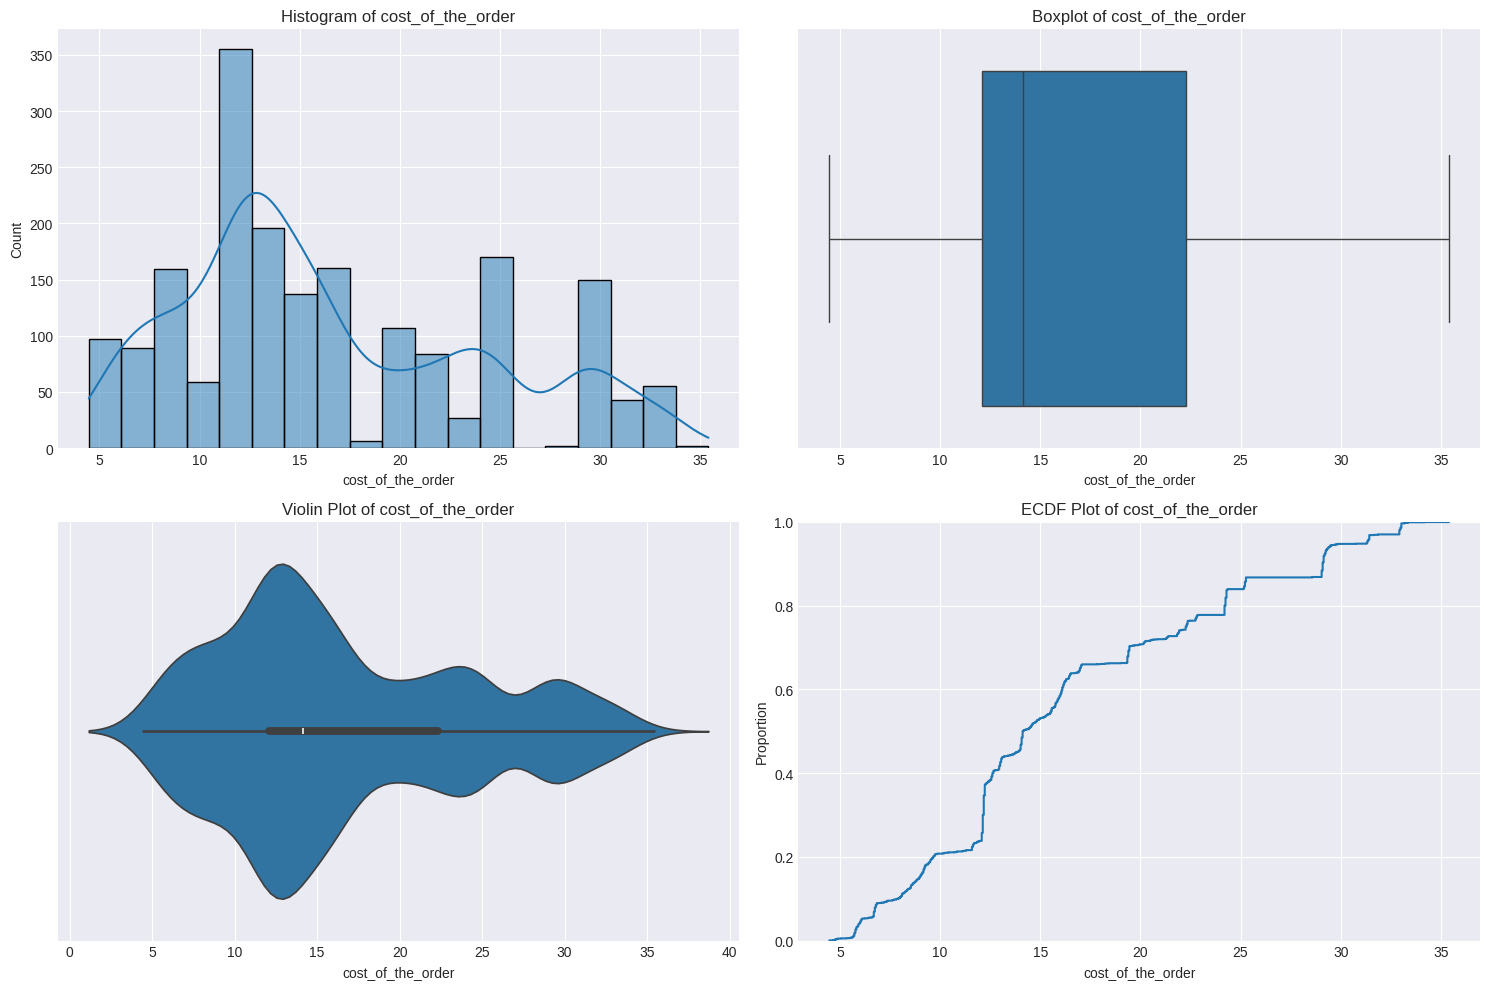

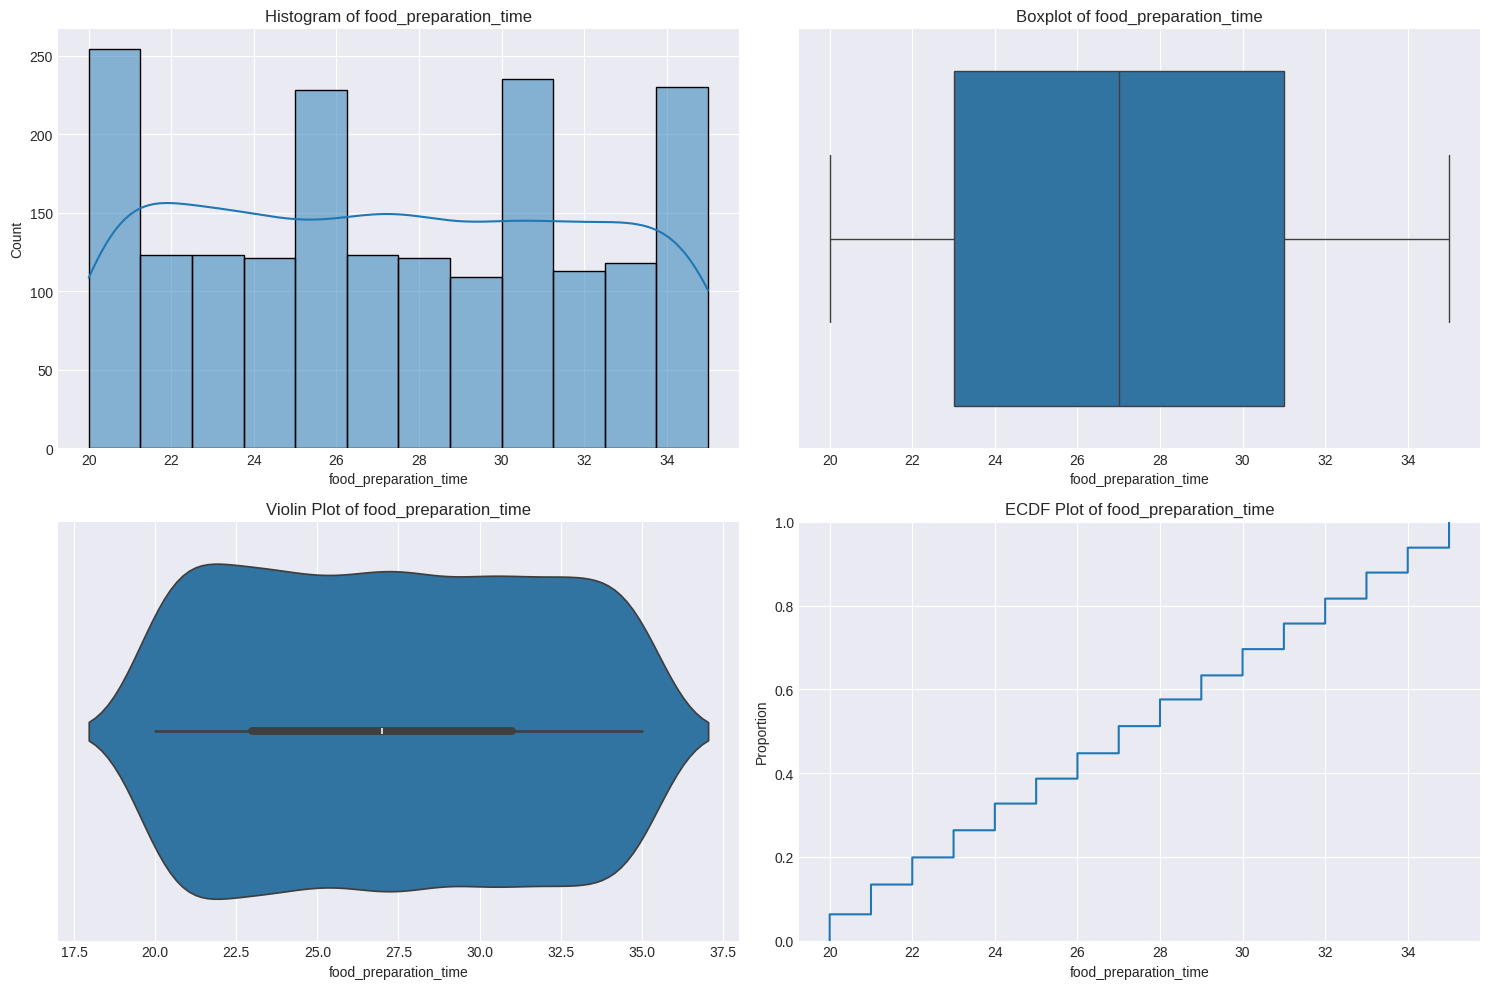

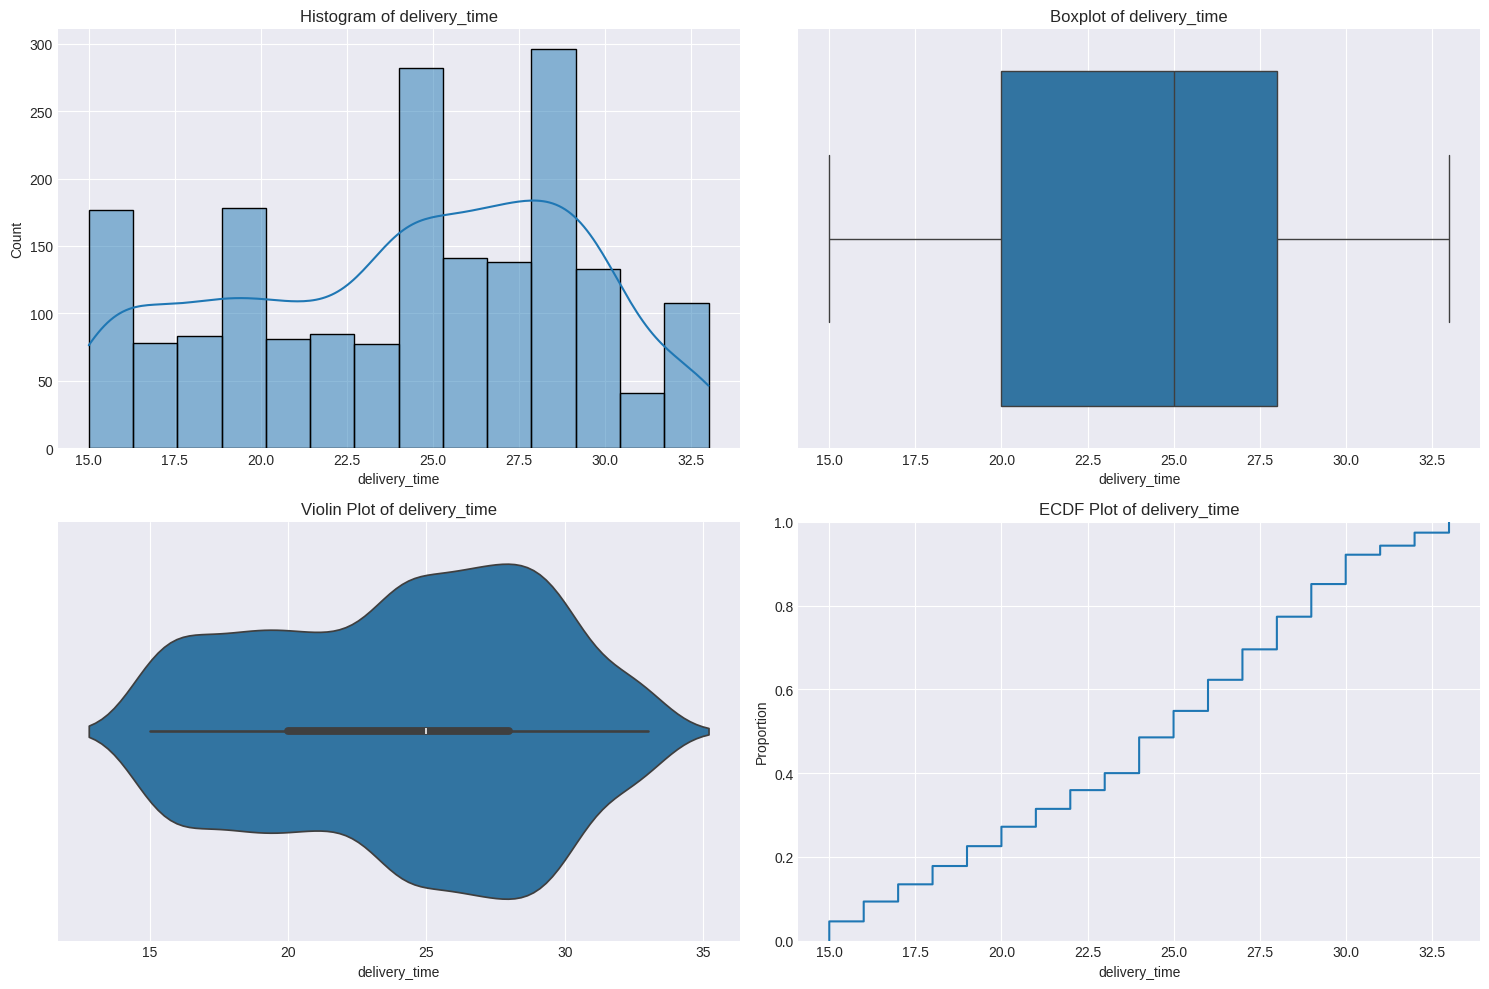

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x3600 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x3600 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


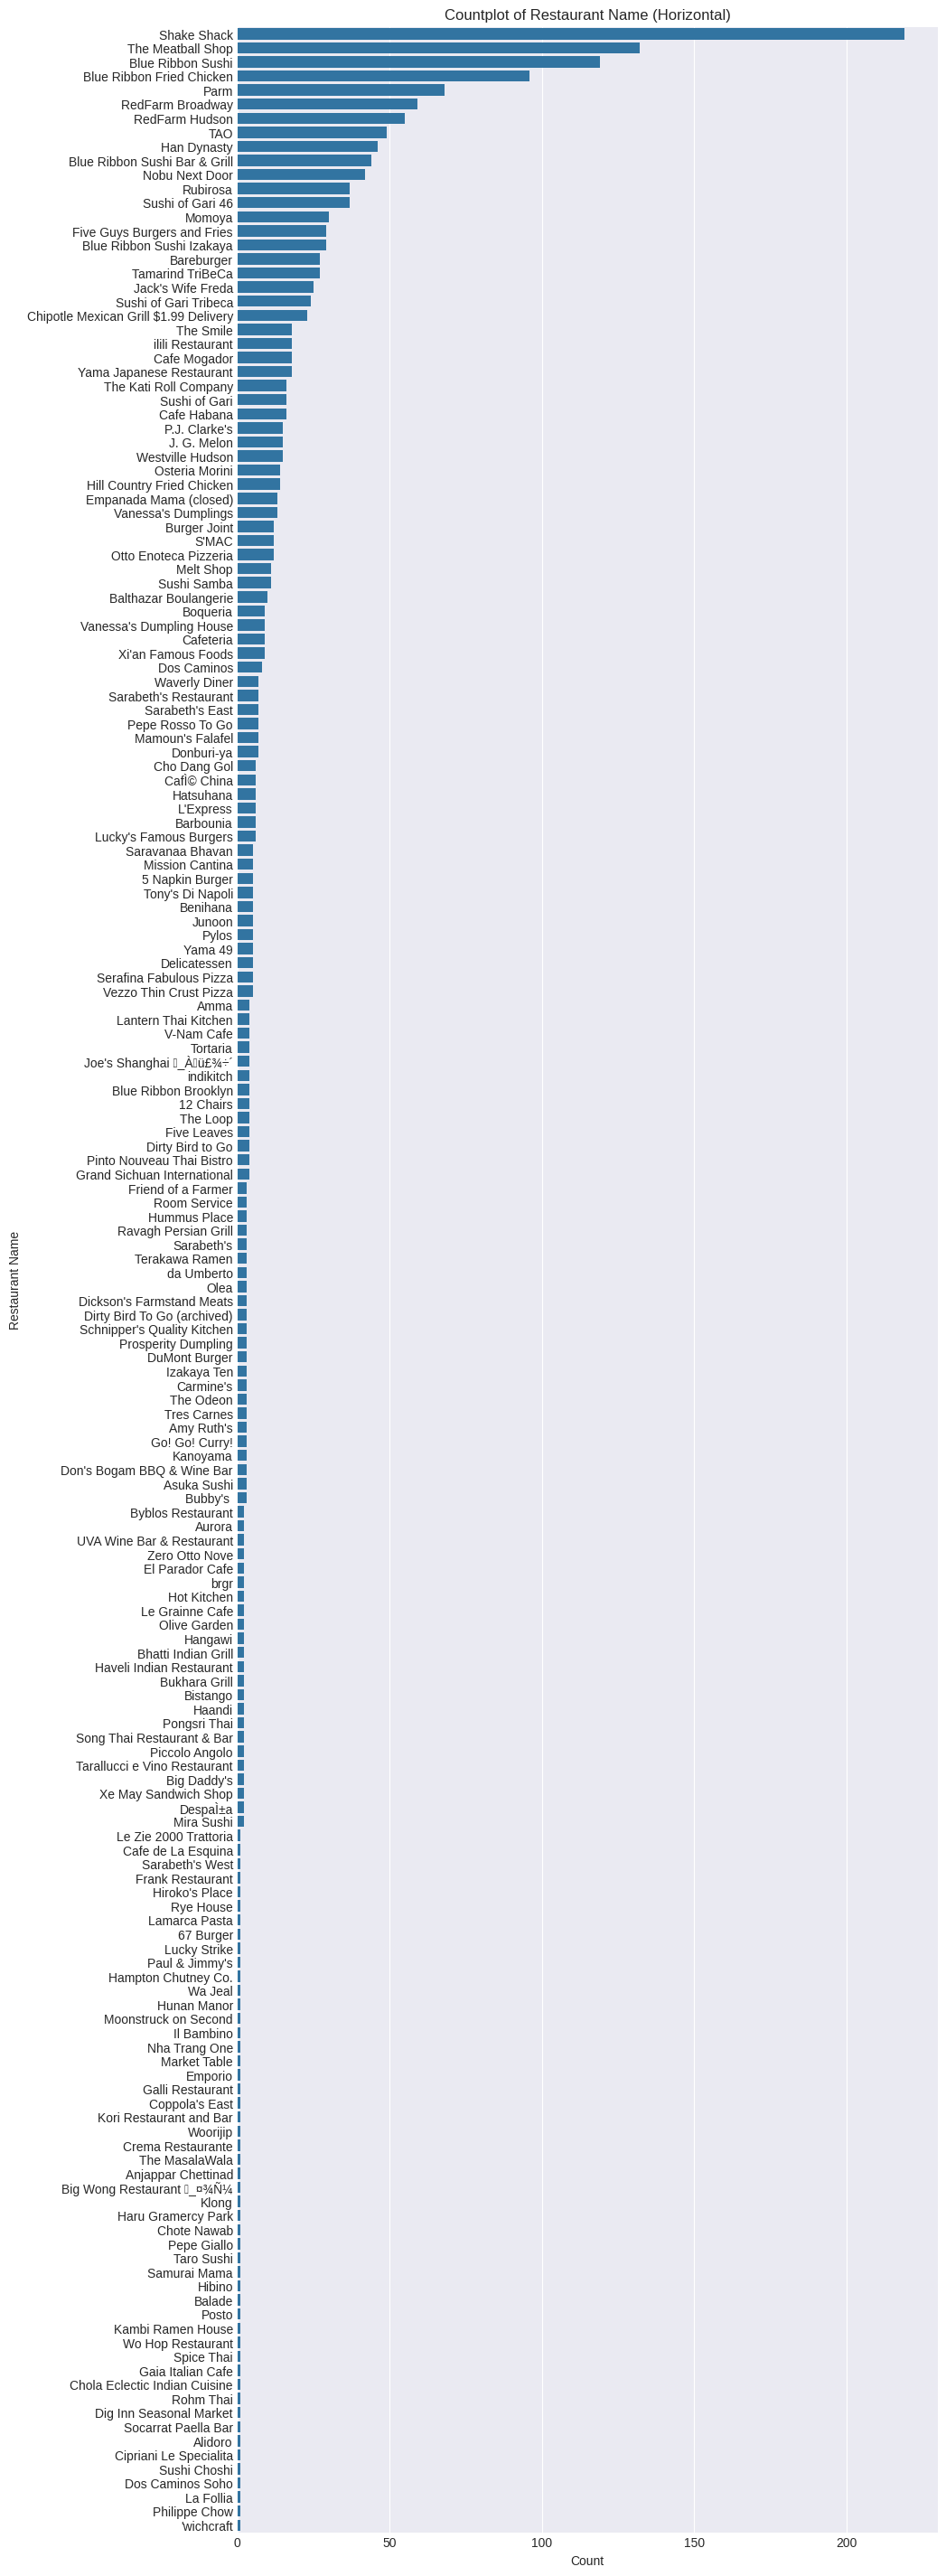

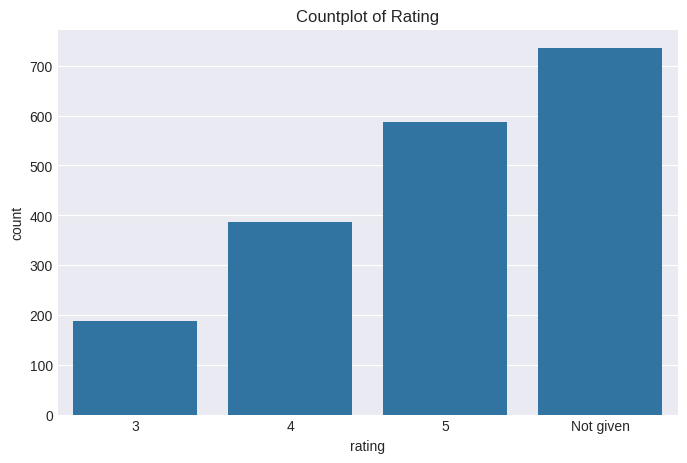

<ipython-input-11-b49b16edc3fa>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_the_week', palette='coolwarm')


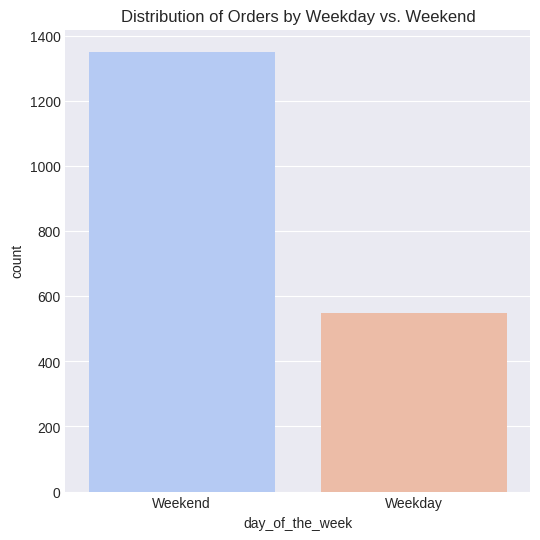

Number of unique customers: 1200


In [ ]:
# Write the code here
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots display correctly
plt.style.use('seaborn-darkgrid')

# 1. Numerical Variables
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
for col in numerical_cols:
    plt.figure(figsize=(15, 10))

    # Histogram
    plt.subplot(2, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    # Violin Plot
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[col])
    plt.title(f'Violin Plot of {col}')

    # ECDF Plot
    plt.subplot(2, 2, 4)
    sns.ecdfplot(df[col])
    plt.title(f'ECDF Plot of {col}')

    plt.tight_layout()
    plt.show()

# 2. Categorical Variables
categorical_cols = ['day_of_the_week', 'cuisine_type', 'restaurant_name']
for col in categorical_cols:
    plt.figure(figsize=(10, 5))

    # Horizontal Bar Plot
    plt.figure(figsize=(10, 36))
sns.countplot(data=df, y='restaurant_name', order=df['restaurant_name'].value_counts().index)
plt.title('Countplot of Restaurant Name (Horizontal)')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.show()

# 3. Ordinal Variables (e.g., Rating)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', order=sorted(df['rating'].dropna().unique()))
plt.title('Countplot of Rating')
plt.show()


# 4. Binary Variables (Example: Weekend vs. Weekday if 'is_weekend' was created)
# Assuming you have a binary column like 'is_weekend' derived from 'day_of_the_week'
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='day_of_the_week', palette='coolwarm')
plt.title('Distribution of Orders by Weekday vs. Weekend')
plt.show()

# 5. Unique Customers Count (if needed)
unique_customers = df['customer_id'].nunique()
print(f"Number of unique customers: {unique_customers}")

##

# 6. Define numerical columns
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']



#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Write the code here
# Get the top 5 restaurants based on the number of orders
top_5_restaurants = df['restaurant_name'].value_counts().nlargest(5)
print(top_5_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68

In [ ]:
# Write the code here
# Filter for weekend orders (assuming 'day_of_the_week' column contains 'Weekend' as an indicator)
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Get the most popular cuisine type based on the number of orders on weekends
popular_cuisine_weekends = weekend_orders['cuisine_type'].value_counts().idxmax()

# Print the most popular cuisine
print(f"The most popular cuisine on weekends is: {popular_cuisine_weekends}")


The most popular cuisine on weekends is: American


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

The most popular cuisine on weekends is: American

In [ ]:
# Write the code here
# Total number of orders
total_orders = df.shape[0]

# Number of orders that cost more than $20
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Calculate the percentage
percentage_above_20 = (orders_above_20 / total_orders) * 100

# Print the result
print(f"Percentage of orders that cost more than $20: {percentage_above_20:.2f}%")


Percentage of orders that cost more than $20: 29.24%


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

Percentage of orders that cost more than $20: 29.24%

In [ ]:
# Write the code here
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Print the result
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")


The mean order delivery time is: 24.16 minutes


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

The mean order delivery time is: 24.16 minutes

In [ ]:
# Write the code here
# Group by customer_id and count the number of orders per customer
top_customers = df['customer_id'].value_counts().nlargest(3)

# Display the customer IDs and the number of orders they placed
print("Top 3 customers and the number of orders they placed:")
print(top_customers)


Top 3 customers and the number of orders they placed:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

customer_id

52832    13

47440    10

83287     9

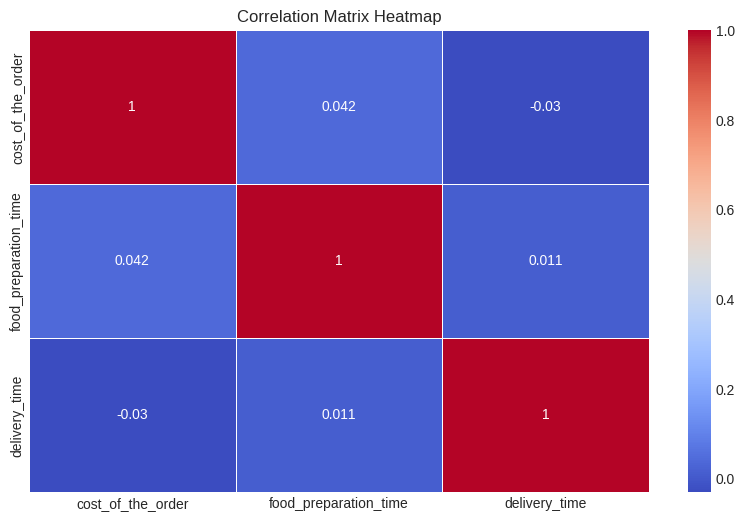

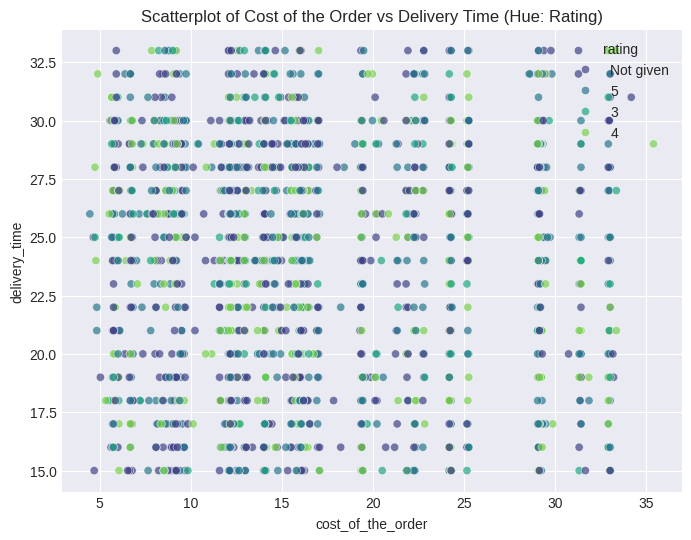

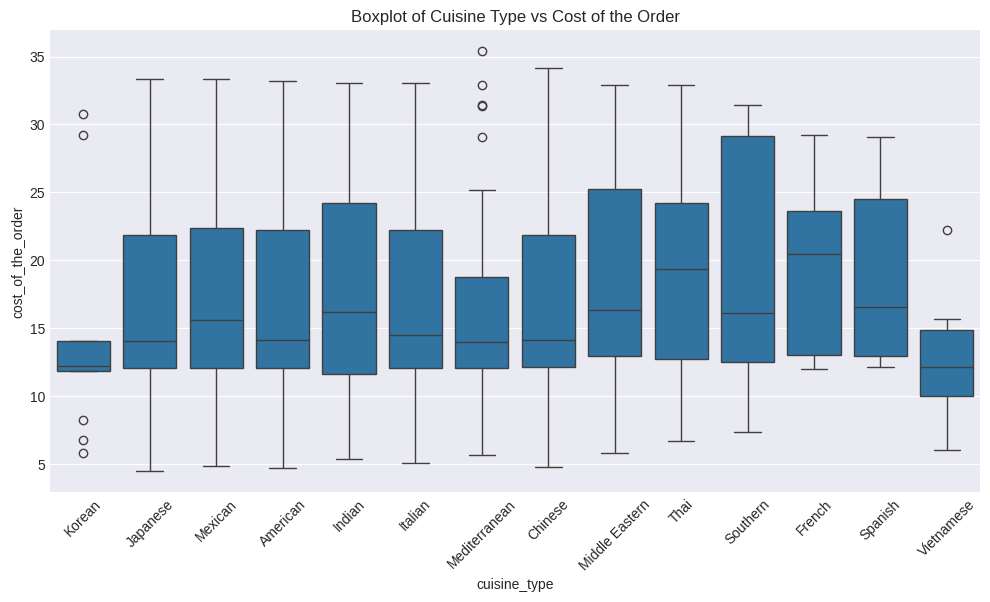

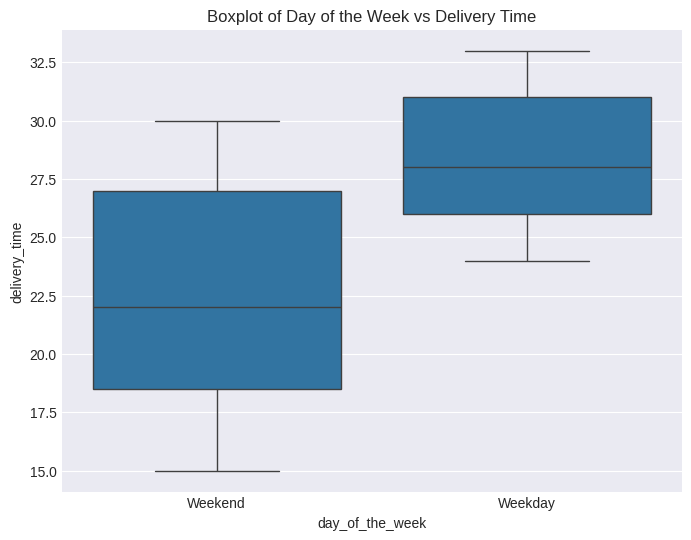

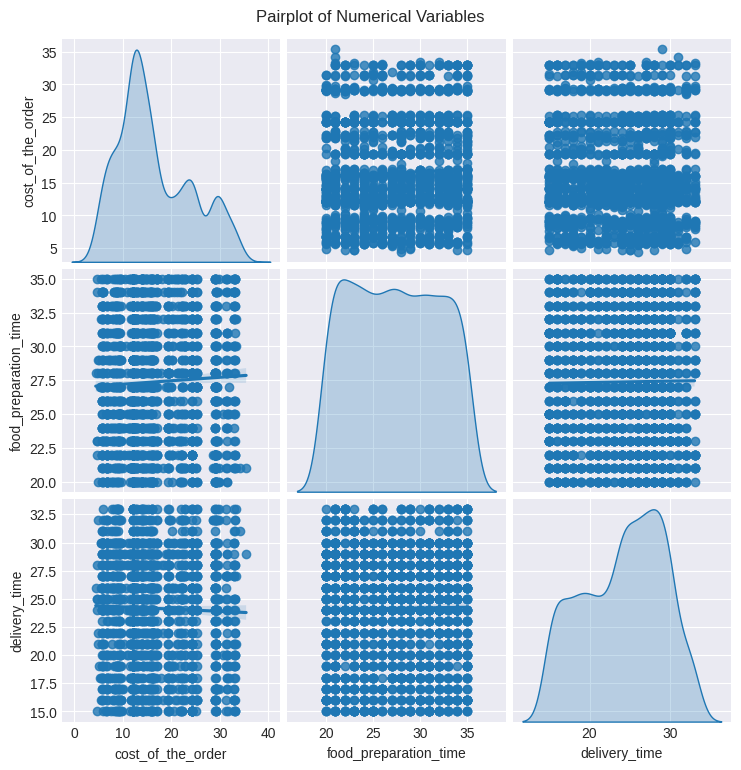

In [ ]:
# Write the code here
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Matrix and Heatmap for Numerical Variables
plt.figure(figsize=(10, 6))
corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 2. Scatterplot for Numerical Variables: Cost of the Order vs. Delivery Time
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='cost_of_the_order', y='delivery_time', hue='rating', palette='viridis', alpha=0.7)
plt.title('Scatterplot of Cost of the Order vs Delivery Time (Hue: Rating)')
plt.show()

# 3. Boxplot for Categorical vs. Numerical: Cuisine Type vs Cost of the Order
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=45)
plt.title('Boxplot of Cuisine Type vs Cost of the Order')
plt.show()

# 4. Boxplot for Categorical vs. Numerical: Day of the Week vs Delivery Time
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title('Boxplot of Day of the Week vs Delivery Time')
plt.show()

# 5. Pairplot for All Numerical Variables (cost_of_the_order, food_preparation_time, delivery_time)
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']], kind='reg', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here
# Filter out rows where the rating is missing or "Not given"
df_filtered = df[df['rating'] != 'Not given'].copy()

# Convert the rating column to numeric (if it is not already)
df_filtered['rating'] = pd.to_numeric(df_filtered['rating'])

# Group by restaurant and calculate the rating count and average rating
restaurant_ratings = df_filtered.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter the restaurants that meet the criteria
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Display the eligible restaurants
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)


Restaurants eligible for the promotional offer:
                           count  mean
restaurant_name                       
Blue Ribbon Fried Chicken     64  4.33
Blue Ribbon Sushi             73  4.22
Shake Shack                  133  4.28
The Meatball Shop             84  4.51


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

Blue Ribbon Fried Chicken
     
Blue Ribbon Sushi             
Shake Shack                  
The Meatball Shop             

In [ ]:
# Write the code here
# Calculate the revenue based on the given conditions
df['revenue'] = 0  # Initialize a revenue column

# 25% charge for orders costing more than 20 dollars
df.loc[df['cost_of_the_order'] > 20, 'revenue'] = df['cost_of_the_order'] * 0.25

# 15% charge for orders costing more than 5 dollars but less than or equal to 20 dollars
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'revenue'] = df['cost_of_the_order'] * 0.15

# Calculate the total net revenue generated by the company
total_revenue = df['revenue'].sum()

# Display the total revenue
print(f"The total net revenue generated by the company is: ${total_revenue:.2f}")


The total net revenue generated by the company is: $6166.30


<ipython-input-19-26f971916390>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.6875 7.3    6.305  6.075  8.2575 6.05   7.275  7.275  5.47   7.8325
 7.2625 7.275  6.075  7.4575 8.305  6.0625 5.6875 7.2625 5.47   7.3475
 5.0575 7.275  5.6875 6.0625 8.2575 7.845  8.2575 6.05   8.2325 7.2625
 7.3225 5.6875 5.3    6.3175 8.2575 6.05   5.4575 7.8225 6.075  5.565
 5.1175 5.59   5.4575 7.2875 5.59   7.8225 6.075  6.3175 7.2625 7.3
 8.2325 6.05   7.335  6.0625 7.3    5.7    8.2575 7.2625 7.8325 8.2575
 5.59   5.7    5.045  5.565  7.2875 6.305  7.2875 7.8575 8.2575 7.3375
 7.2875 6.0625 8.2575 7.8575 7.3125 8.245  7.2875 6.05   7.3    7.275
 6.05   5.565  5.4825 5.7125 5.7    6.075  7.2875 6.075  7.275  5.3475
 6.0625 8.2325 7.275  5.335  5.045  7.3125 6.305  6.05   5.4825 6.05
 8.2325 6.05   6.305  5.6875 6.075  8.2575 6.0625 5.4575 7.2875 5.565
 7.275  5.59   6.075  6.0625 5.045  7.2875 5.4825 8.2325 7.2875

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

The total net revenue generated by the company is: $6166.30

In [ ]:
# Write the code here
# Calculate the total time for each order (food preparation time + delivery time)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Find the number of orders where the total time is greater than 60 minutes
orders_above_60 = df[df['total_time'] > 60].shape[0]

# Total number of orders
total_orders = df.shape[0]

# Calculate the percentage of orders taking more than 60 minutes
percentage_above_60 = (orders_above_60 / total_orders) * 100

# Print the result
print(f"Percentage of orders that take more than 60 minutes: {percentage_above_60:.2f}%")


Percentage of orders that take more than 60 minutes: 10.54%


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

Percentage of orders that take more than 60 minutes: 10.54%

In [ ]:
# Write the code here
# Calculate the mean delivery time for weekdays and weekends
mean_delivery_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Print the results
print(f"Mean delivery time on weekdays: {mean_delivery_weekdays:.2f} minutes")
print(f"Mean delivery time on weekends: {mean_delivery_weekends:.2f} minutes")


Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

Mean delivery time on weekdays: 28.34 minutes

Mean delivery time on weekends: 22.47 minutes

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

Based on the analysis, we observe that a few top restaurants, especially those with higher ratings, receive a large share of orders, suggesting strong customer loyalty. Popular cuisines, such as American and Italian, see increased demand on weekends. However, a high rate of "Not given" ratings limits insights into customer satisfaction; incentivizing feedback could improve this. Delivery times are slightly longer on weekends, likely due to higher demand, indicating potential benefits from dynamic delivery resources during peak times. Additionally, many orders fall below $20, suggesting a revenue opportunity by promoting bundle deals or discounts on higher-value orders. Supporting low-rated or low-order-volume restaurants with performance feedback, quality improvement insights, and a rating-based incentive on commission fees could elevate overall service standards and customer satisfaction.
*  

### Recommendations:
To boost customer satisfaction and revenue, the company should prioritize high-rated restaurant partnerships and expand popular cuisine options, such as American and Italian, especially with targeted weekend promotions. Enhancing feedback collection through incentives can provide actionable insights, particularly for lower-rated restaurants, helping them improve. Streamlining delivery operations on weekends with real-time delivery expectations can reduce delays. Promoting higher-value orders via discounts on bundled items over $20 will increase order values. Lastly, support for low-performing restaurants through performance feedback and a rating-based commission model will drive quality improvements across the board.

*  

---